## STEP 1:  

Import dataset by sql query file (foo.db) to your local computer and create connection between your sql and  python  

In [1]:
# Import library
import sqlite3
import pandas as pd

In [2]:
# Connect to database
sqliteConnection = sqlite3.connect('foo.db')
cursor = sqliteConnection.cursor()

try:
    # Execute the original query
    cursor.execute("""
        SELECT DISTINCT * 
        FROM olist_customers_dataset ocd
        LEFT JOIN olist_orders_dataset ood ON ocd.customer_id = ood.customer_id
        LEFT JOIN olist_order_items_dataset ooid ON ooid.order_id = ood.order_id
        LEFT JOIN olist_products_dataset opd ON opd.product_id = ooid.product_id
        LEFT JOIN olist_sellers_dataset osd ON osd.seller_id = ooid.seller_id
        LEFT JOIN olist_order_payments_dataset oopd ON oopd.order_id = ood.order_id
        LEFT JOIN olist_order_reviews_dataset oord ON oord.order_id = ood.order_id;
    """)

    # Fetch column names from the original query
    column_names = [description[0] for description in cursor.description]

    # Fetch all the rows
    rows = cursor.fetchall()

    # Create a DataFrame using the column names
    data = pd.DataFrame(rows, columns=column_names)

except sqlite3.Error as e:
    print("Error:", e)

finally:
    # Close the cursor and connection
    if sqliteConnection:
        sqliteConnection.close()
        print("SQLite connection is closed")


SQLite connection is closed


## STEP 2: 

Import library needed ( pandas, matplotlib, and seaborn)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## STEP 3: 

Merge the dataset using their key connection based on dataset framework above

In [4]:
# Data base sudah dilakukan merge pada tahap 1 berikut informasi data yang akan digunakan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   customer_id                    119143 non-null  object
 1   customer_unique_id             119143 non-null  object
 2   customer_zip_code_prefix       119143 non-null  object
 3   customer_city                  119143 non-null  object
 4   customer_state                 119143 non-null  object
 5   order_id                       119143 non-null  object
 6   customer_id                    119143 non-null  object
 7   order_status                   119143 non-null  object
 8   order_purchase_timestamp       119143 non-null  object
 9   order_approved_at              119143 non-null  object
 10  order_delivered_carrier_date   119143 non-null  object
 11  order_delivered_customer_date  119143 non-null  object
 12  order_estimated_delivery_date  119143 non-nu

---
Berdasarkan data tersebut, terdapat kolom2 yang double 
misalnya order id pada index kolom 5 dan kolom 13 dan jika diperhatikan jumlah row datanya berbeda sehingga data ini memiliki nilai yang missing

---

In [5]:
# Melakukan filter data dengan mengambil data dengan kolom yang tidak double
df_olah = data.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,30,31,32,34,
                     35,36,37,38,40,41,42,43,44]]
# simpan data csv
df_olah.to_csv('data_olah_olist.csv', index=False)

## STEP 4: 

Deal Null Values
1. Null Value Identification
2. Would you please describe to us, why null values happen?
3. How to deal with our null value?

In [6]:
# Mengidentifikasi nilai Null
df_olah.isnull().sum()

customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                    833
product_id                       833
seller_id                        833
shipping_limit_date              833
price                            833
freight_value                    833
product_category_name            833
product_name_lenght              833
product_description_lenght       833
product_photos_qty               833
product_weight_g                 833
product_length_cm                833
product_height_cm                833
product_width_cm                 833
seller_zip_code_prefix           833
s

---
1. Berdasarkan hasil diatas, terlihat bahwa 28 dari 39 kolom data memiliki nilai missing value yang berbeda beda jumlahnya.
2. Null atau Nan atau None adalah representasi dari nilai kosong/hilang/tidak ada yang dapat disebabkan beberapa alasan seperti
- Data yang hilang atau tidak tersedia: misalnya data reviu platform belanja online biasanya diisi ketika barang sudah sampai, sedangkan jika barang belum sampai biasanya customer belum mau mengisikan kecuali complain. Artinya bisa jadi ada data pembelian namun reviewnya tidak ada.
- adanya proses penggabungan data: biasanya saat menggabungkan dua atau lebih sumber data jika ada perbedaan cakupan atau tidak cocok maka akan menghasilkan nilai Null.
- Kesalahan Pemrosesan data: biasanya dapat disebabkan karena kesalahan dalah melakukan pengolahan dan manipulasi data
3. Untuk mengatasi adanya Null ada beberapa cara yang dapat dilakukan 
- Menghapus baris/kolom dengan Nilai NULL
- Mengisi Nilai Null dengan nilai tertentu berdasarkan mean, modus, median, ataupun kemiripan karakteristik data yang ada, atau bisa juga dengan metode Forward Fill (mengisi nilai dengan nilai yang sama dengan sebelumnya), atau backward (mengisi nilai Null dengan nilai yang sama dengan nilai setelahnya)
- Namun nilai Null juga dapat dibiarkan ketika melakukan analisis deskriptif tetapi perlu di atasi jika ingin melakukan analisis lebih lanjut

---

#### Melakukan handling nilai Missing Value

In [7]:
# Mengecek nilai dan jumlahnya dalam kolom 'order_status'
total_order_status= df_olah['order_status'].value_counts()

print("\nNilai dan jumlahnya dalam kolom 'Order Status':")
print(total_order_status)

# Melakukan filter untuk melihat order status dan kaitannya dengan missing value pada data order item dataset
df_order_item= df_olah.loc[:,['order_status','order_id','product_id','order_item_id','shipping_limit_date','price','freight_value']]
df_order_item_null =df_order_item[df_order_item.isna().any(axis=1)]

# Mengecek nilai per jenis order status dan jumlahnya 
total_order_status_null= df_order_item_null['order_status'].value_counts()

print("\nNilai  jumlahnya dalam kolom 'Order Status' yang missing:")
print(total_order_status_null)


Nilai dan jumlahnya dalam kolom 'Order Status':
order_status
delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: count, dtype: int64

Nilai  jumlahnya dalam kolom 'Order Status' yang missing:
order_status
unavailable    645
canceled       180
created          5
invoiced         2
shipped          1
Name: count, dtype: int64


#### Handing Missing Value ke-1

In [8]:
# Mengecek data NULL status canceled dan unavailable
df_order_item_null[(df_order_item_null['order_status'].isin(['unavailable','canceled']))]

,order_status,order_id,product_id,order_item_id,shipping_limit_date,price,freight_value
52,canceled,6e98de3a85c84ead6689189b825d35b5,None,None,None,None,None
341,unavailable,df8c077268f7f3baaac0892eb3143642,None,None,None,None,None
438,unavailable,c609f82bcf7a90292a5940205ebd7e93,None,None,None,None,None
448,unavailable,cb4a79c1e6c9ae44302861e7602cc449,None,None,None,None,None
661,unavailable,af264f3527e94e431f0dcd56cd6b406d,None,None,None,None,None
...,...,...,...,...,...,...,...
117732,unavailable,2f634e2cebf8c0283e7ef0989f77d217,None,None,None,None,None
117792,unavailable,2b0edc4c59d83dcef85466718c36a317,None,None,None,None,None
118082,canceled,81b7c7bbc8ec003eeb67d87441a6a148,None,None,None,None,None
118188,unavailable,8b08f0e729f58529ed03e763270f78d5,None,None,None,None,None


---
Status order cancel adalah customer yang batal melakukan pemesanan sedangkan unavailable  merupakan item order yang tidak tersedia sehingga hal ini dimungkinkan tidak ada item product order yang tercatat. oleh karena itu itu missing value pada status order cancel dan unavailable dalam hal ini didrop untuk kebutuhan analisis selanjutnya

---

#### Handing Missing Value ke-2

In [9]:
# Mengecek data NULL status order, shipped, dan invoiced created
df_order_item_null[(df_order_item_null['order_status'].isin(['created','shipped','invoiced']))]

,order_status,order_id,product_id,order_item_id,shipping_limit_date,price,freight_value
15653,created,35de4050331c6c644cddc86f4f2d0d64,None,None,None,None,None
54298,created,90ab3e7d52544ec7bc3363c82689965f,None,None,None,None,None
61253,created,dba5062fbda3af4fb6c33b1e040ca38f,None,None,None,None,None
65235,shipped,a68ce1686d536ca72bd2dadc4b8671e5,None,None,None,None,None
81441,invoiced,2ce9683175cdab7d1c95bcbb3e36f478,None,None,None,None,None
92467,invoiced,e04f1da1f48bf2bbffcf57b9824f76e1,None,None,None,None,None
95033,created,b5359909123fa03c50bdb0cfed07f098,None,None,None,None,None
104652,created,7a4df5d8cff4090e541401a20a22bb80,None,None,None,None,None


---
Berdasarkan data diatas, untuk missing value pada pada order status 'created','shipped','invoiced' tidak memungkinkan diimputasi sehingga untuk kebutuhan analisis dilakukan drop

---

In [10]:
# Drop Missing value yang  status ordernya cancelled , shipped, invoiced created dan unavailable
df_filter = (df_olah['order_status'].isin(['canceled','unavailable','shipped','invoiced','created']))
df=df_olah[~(df_filter & df_olah[['order_item_id','product_id']].isna().any(axis=1))]
df.isnull().sum()

customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
product_category_name              0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
seller_zip_code_prefix             0
s

#### Handing Missing Value ke-3: Data Payment

In [11]:
# Melakukan perbaikan tipe data
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['price'] = pd.to_numeric(df['price'])
df['freight_value'] = pd.to_numeric(df['freight_value'])

# Melakukan filter untuk melihat order status dan kaitannya dengan missing value pada data order payments
df_order_payment = df.loc[:,['order_id','product_id','order_status','price','freight_value','payment_sequential','payment_type','payment_installments','payment_value' ]]
df_null_payment = df_order_payment[df_order_payment.isna().any(axis=1)]
df_null_payment 

C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\2820329462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\2820329462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'])
C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\2820329462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,order_id,product_id,order_status,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
25365,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,delivered,44.99,2.83,None,None,None,None
25366,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,delivered,44.99,2.83,None,None,None,None
25367,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,delivered,44.99,2.83,None,None,None,None


---
Berdasarkan data diatas, status ordernya adalah delivered atau sudah diterima artinya customer seharusnya sudah melakukan checkout pembelian, oleh karena itu nilai yang None akan diimputasi berdasarkan kemiripan karakteristik product

---

In [12]:
df_order_payment[df_order_payment['product_id']=='5a6b04657a4c5ee34285d1e4619a96b4'] # mengecek pada produk yang sama pada keseluruhan data order payment

,order_id,product_id,order_status,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
25365,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,delivered,44.99,2.83,None,None,None,None
25366,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,delivered,44.99,2.83,None,None,None,None
25367,bfbd0f9bdef84302105ad712db648a6c,5a6b04657a4c5ee34285d1e4619a96b4,delivered,44.99,2.83,None,None,None,None
71131,38c5c2886f2aab75bb1ae3f79a3f300d,5a6b04657a4c5ee34285d1e4619a96b4,delivered,54.99,9.49,1,credit_card,3,64.48


---

Berdasarkan data yang dimiliki, untuk paymen_sequential, payment_type dan payment_intallments dilakukan imputasi dengan product serupa sedangkan payment value dilakukan imputasi dengan menjumlahkan price dan freight value. data ini missing  jika kita lihat reviu customer, dia tidak menerima barang tapi statusnya delivered.

---

In [13]:
# Melakukan imputasi pada data payment
df.loc[:, 'payment_value'] = df['payment_value'].fillna(df['price'] + df['freight_value'])

# Mengisi missing value dengan nilai di baris sebelumnya
df.loc[:, 'payment_sequential'] = df['payment_sequential'].bfill()
df.loc[:, 'payment_type'] = df['payment_type'].bfill()
df.loc[:, 'payment_installments'] = df['payment_installments'].bfill()


#### Handing Missing Value ke-4: Data Review

In [14]:
# Melakukan filter untuk melihat order status dan kaitannya dengan missing value pada data order item dataset
df_filter_reviu= df.loc[:,['seller_id','order_purchase_timestamp','product_id','order_status','payment_value','product_photos_qty', 'review_id',
                          'review_score','review_comment_title','review_comment_message',
                          'review_creation_date','review_answer_timestamp']]
df_filter_null_reviu =df_filter_reviu[df_filter_reviu.isna().any(axis=1)]
df_filter_null_reviu 

,seller_id,order_purchase_timestamp,product_id,order_status,payment_value,product_photos_qty,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
18,4a3ca9315b744ce9f8e9374361493884,2017-05-11 13:48:47,99a4788cb24856965c36a24e339b6058,delivered,67.98,1,None,None,None,None,None,None
19,4a3ca9315b744ce9f8e9374361493884,2017-05-11 13:48:47,99a4788cb24856965c36a24e339b6058,delivered,34.05,1,None,None,None,None,None,None
264,ac3508719a1d8f5b7614b798f70af136,2018-02-06 22:08:09,d2f1978552a7604790fa5922f4345998,shipped,125.43,4,None,None,None,None,None,None
268,6219ba2359cfb97f2e38fd4c321eb309,2017-10-09 09:58:11,3e6f2d0265ff6265eb639a8d3027f5a3,delivered,75.66,1,None,None,None,None,None,None
594,0eaa7e33d73809f1f925f7d07c506cbd,2018-08-27 17:01:43,2715967684d6991f7501693bfe08c08b,delivered,53.48,1,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
118383,08d2d642cf72b622b14dde1d2f5eb2f5,2017-11-25 17:14:25,99b5175198369d12de8feee13dafac16,shipped,20.10,1,None,None,None,None,None,None
118672,972d0f9cf61b499a4812cf0bfa3ad3c4,2018-01-13 18:32:59,14a174908a08ad7cfb56d3814d8e0ea5,delivered,103.83,1,None,None,None,None,None,None
118800,8bd0f31cf0a614c658f6763bd02dea69,2017-12-06 11:07:43,9df634af5c467f3b07f3d92f7765aa64,delivered,93.78,2,None,None,None,None,None,None
118971,1bb2bdb95f4841f1bba2c0d2cd83d3c9,2018-06-23 21:46:52,9d0bb30eed80184666c8acad23921283,delivered,36.28,1,None,None,None,None,None,None


---

jika dilihat berdasarkan informasi data review yang missing, saya menduga bahwa, NONE ini adalah kondisi customer belum mengisikan review barang, karena umumnya review barang baik yang sudah sampai atau kondisi lainnya customer bisa untuk tidak mengisikan. sehingga dalam analisis yang diolah sementara saya biarkan Null pada review. Handling Akan dilakukan jika akan melakukan analisis review lebih lanjut

---

### STEP 5: Add columns 

1. Add columns based on the time period from the order purchase timestamp column
2. Add columns by year
3. Add columns by month
4. Add columns by name of the day
5. Add columns by hour
6.	Add columns based on the actual price the customer purchased
- Total price value
- Total freight value
- Total order value (total price + total freight)

contoh:
Total Order Value
1. Total price value = $95 (harga)
2. Total freight value = $100 (kargo/pengantaran)
3. Total order value = $95 + $100 = $195



In [15]:
# Mengambil data yang dibutuhkan untuk saat ini
column_exclude = ['customer_zip_code_prefix','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date',
                  'order_estimated_delivery_date','seller_zip_code_prefix']
data_olah =df.drop(columns=column_exclude)

# Membuat kolom baru tahun, bulan, nama hari, dan jam
data_olah['year'] = data_olah['order_purchase_timestamp'].dt.year
data_olah['month'] = data_olah['order_purchase_timestamp'].dt.month
data_olah['name_day'] = data_olah['order_purchase_timestamp'].dt.day_name()
data_olah['hour'] = data_olah['order_purchase_timestamp'].dt.hour

# Membuat kolom baru Total Order Value
data_olah['total_order_value'] = data_olah['price'] + data_olah['freight_value']
data_olah.sample(5)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,year,month,name_day,hour,total_order_value
48585,c0693ea2d67ed729c24899e38cc5ff5b,027ce05786a9c91b427cf168e82819e0,santo amaro da imperatriz,SC,7eede674247503d84fc645c855298b1f,delivered,2017-09-29 17:58:21,1,6ae3f85f46a37844372252496c77b4d8,53243585a1d6dc2643021fd1853d8905,...,5,,Todo certo entrega rapida.,2017-10-13 00:00:00,2017-10-13 22:42:02,2017,9,Friday,17,236.21
108109,68d33255dae222bd6b4d4ccb0baebed0,eeea4713a0f6afd86c3dc091ada56fef,coluna,MG,88356c5bbc83ec0e1f10866b51b33342,delivered,2018-05-22 12:43:25,1,60495adb1f1a49c8aea75e5e56a47a48,0df3984f9dfb3d49ac6366acbd3bbb85,...,4,,bacana demais,2018-06-02 00:00:00,2018-06-07 16:47:59,2018,5,Tuesday,12,104.61
94312,b6e18008af6aeb4a5ce5574c15ca2b48,4919652599408c4cdb93218f74137435,salvador,BA,f633c884a99eb63866600655356d973e,shipped,2018-04-04 00:33:47,1,c1ad8ac66c91ad301cefc322ba2adf31,966cb4760537b1404caedd472cc610a5,...,1,,,2018-04-27 00:00:00,2018-04-27 12:50:15,2018,4,Wednesday,0,619.90
38559,835db60e0407215c179aacec8574ddc9,f880707ebb7cdcef8edab8d8a74667c6,brasilia,DF,812a3cd39ef8ee7455ea166a05534b0a,delivered,2017-12-06 21:12:08,1,2342acbbf4c5ba6896316d17a573f40f,080199a181c46c657dc5aa235411be3b,...,5,,,2017-12-15 00:00:00,2017-12-17 18:43:42,2017,12,Wednesday,21,194.50
80855,596115f3401ce7826f03ca7c3d81392a,0dd643f968d1268457ca7311eb347e74,belo horizonte,MG,3b8163585696cb14f0e7c8183bb91339,delivered,2017-11-09 20:11:46,1,6c712952b8ef62f8d06a0314917400c8,620c87c171fb2a6dd6e8bb4dec959fc6,...,5,,entregue antes do prazo,2017-11-19 00:00:00,2017-11-20 15:23:37,2017,11,Thursday,20,95.21


## STEP 6:

Customer Demographic
1. Change the name of the state and city columns to address static and address city then do a grouping to calculate the total unique customer id based on the state address and it’s visualization

state → address_static

city → address_city


C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\3673519.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='total_unique_customers', y='address_static', data=customer_state, palette=palette)


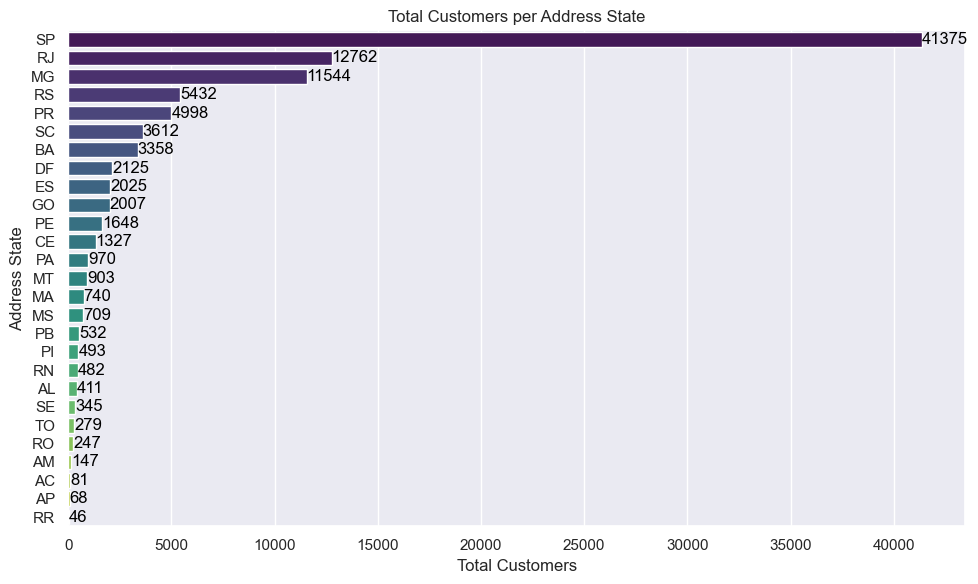

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengubah nama kolom
data_olah.rename(columns={'customer_state': 'address_static', 'customer_city': 'address_city'}, inplace=True)

# Mengelompokkan dan menghitung total pelanggan unik berdasarkan state address
customer_state = data_olah.groupby('address_static')['customer_id'].nunique().reset_index()
customer_state.columns = ['address_static', 'total_unique_customers']

# Urutkan berdasarkan 'total_unique_customers' secara descending
customer_state = customer_state.sort_values(by='total_unique_customers', ascending=False)

# Menggunakan seaborn untuk palet warna
palette = sns.color_palette("viridis", len(customer_state))

# Visualization
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Membuat barplot horizontal
bars = sns.barplot(x='total_unique_customers', y='address_static', data=customer_state, palette=palette)

# Menampilkan jumlah di atas setiap bar
for index, value in enumerate(customer_state['total_unique_customers']):
    plt.text(value, index, round(value, 2), color='black', ha="left", va="center")

plt.xlabel('Total Customers')
plt.ylabel('Address State')
plt.title('Total Customers per Address State')
plt.tight_layout()
plt.show()

2.	Create a grouping to calculate the total unique customer id based on the address city and its visualization

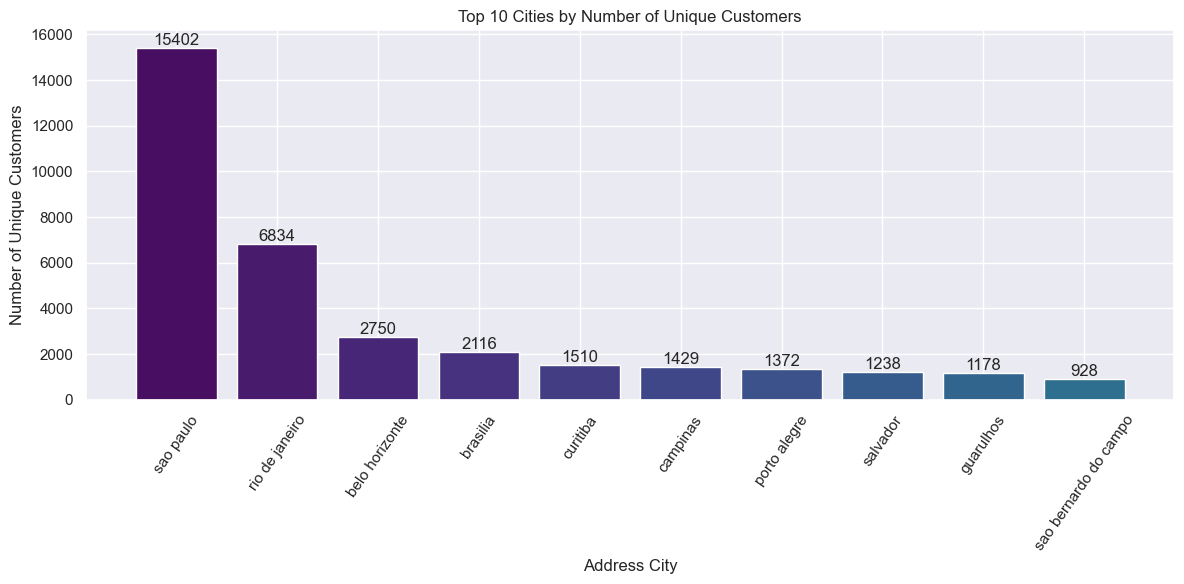

In [50]:
# melakukan pengelompokkan dan menghitung total customer unik berdasarkan city
customer_city = data_olah.groupby('address_city')['customer_id'].nunique().reset_index()

# Urutkan berdasarkan 'total_unique_customers' secara descending
top_10_cities = customer_city .sort_values(by='customer_id', ascending=False).head(10)

# Menggunakan seaborn untuk palet warna
palette = sns.color_palette("viridis", len(customer_state))

# Visualization
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_cities['address_city'], top_10_cities['customer_id'], color=palette)

# Menampilkan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Address City')
plt.ylabel('Number of Unique Customers')
plt.title('Top 10 Cities by Number of Unique Customers')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

3.	Make a table regarding the total orders for each customer, then create a column that describes the frequency of orders for each customer (assuming = if below equals 5 it is called a little, otherwise it is a lot)

In [51]:
# Menghitung jumlah order berdasarkan customer id
customer_orders = data_olah.groupby('customer_id')['order_id'].count().reset_index()
customer_orders.columns = ['customer_id', 'total_orders']

# Mengkategorikan jika frekuensi ordernya 5 kebawah dikatakan kecil selainnya banyak
threshold = 5  
customer_orders['order_frequency'] = customer_orders['total_orders'].apply(lambda x: 'little' if x <= threshold else 'lot')
customer_orders.sort_values(by='total_orders')

,customer_id,total_orders,order_frequency
0,00012a2ce6f8dcda20d059ce98491703,1,little
63484,a4a5f407999f3fdea0c1cd239a9df7fb,1,little
63482,a4a4bc6742b800e480f8e5f1e8cc1100,1,little
63481,a4a31639efca4450f58e07417152b15e,1,little
63479,a4a0c32813e4d6b4f6dd95dd11dc62f1,1,little
...,...,...,...
42593,6ee2f17e3b6c33d6a9557f280edd2925,24,lot
56525,92cd3ec6e2d643d4ebd0e3d6238f69e2,26,lot
59740,9af2372a1e49340278e7c1ef8d749f34,29,lot
7524,13aa59158da63ba0e93ec6ac2c07aacb,38,lot


4.	Create a table that lists the first and last purchase dates for each customer, then combine the first purchase, last purchase, and total order tables to generate the difference total order between the last purchase date and the first 

In [55]:
# First purchase date
first_purchase = data_olah.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_date']

# Last purchase date
last_purchase = data_olah.groupby('customer_id')['order_purchase_timestamp'].max().reset_index()
last_purchase.columns = ['customer_id', 'last_purchase_date']

# Menggabungkan First purchase date dan Last purchase date
purchase_dates = pd.merge(first_purchase, last_purchase, on='customer_id')

# Menggabungkan data kategori customer order dan data purchase date
order_purchase_freq = pd.merge(purchase_dates, customer_orders, on='customer_id')

# Mengitung perbedaan total order antara LastPurchaseDate and FirstPurchaseDate
order_purchase_freq['DifferenceTotalOrders'] = order_purchase_freq['total_orders'] - (order_purchase_freq.groupby('customer_id')['total_orders'].transform('first')) 
order_purchase_freq.sort_values(by='total_orders')
order_purchase_freq.to_csv('order_purchase_freq.csv', index=False)
order_purchase_freq.sort_values(by='total_orders')

,customer_id,first_purchase_date,last_purchase_date,total_orders,order_frequency,DifferenceTotalOrders
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,2017-11-14 16:08:26,1,little,0
63484,a4a5f407999f3fdea0c1cd239a9df7fb,2018-06-21 20:07:34,2018-06-21 20:07:34,1,little,0
63482,a4a4bc6742b800e480f8e5f1e8cc1100,2017-11-29 13:03:22,2017-11-29 13:03:22,1,little,0
63481,a4a31639efca4450f58e07417152b15e,2017-06-06 14:47:59,2017-06-06 14:47:59,1,little,0
63479,a4a0c32813e4d6b4f6dd95dd11dc62f1,2017-12-01 13:05:08,2017-12-01 13:05:08,1,little,0
...,...,...,...,...,...,...
42593,6ee2f17e3b6c33d6a9557f280edd2925,2017-03-09 23:39:26,2017-03-09 23:39:26,24,lot,0
56525,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-07 12:05:10,26,lot,0
59740,9af2372a1e49340278e7c1ef8d749f34,2017-04-20 12:45:34,2017-04-20 12:45:34,29,lot,0
7524,13aa59158da63ba0e93ec6ac2c07aacb,2017-09-23 14:56:45,2017-09-23 14:56:45,38,lot,0


In [56]:
# Cek 
data_olah[data_olah['customer_id']=='6ee2f17e3b6c33d6a9557f280edd2925']

,customer_id,customer_unique_id,address_city,address_static,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,...,review_comment_message,review_creation_date,review_answer_timestamp,year,month,name_day,hour,total_order_value,time_category,day
4942,6ee2f17e3b6c33d6a9557f280edd2925,f9ae226291893fda10af7965268fb7f6,guarulhos,SP,c6492b842ac190db807c15aff21a7dd6,delivered,2017-03-09 23:39:26,1,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,...,Ótima loja,2017-03-22 00:00:00,2017-03-23 08:34:13,2017,3,Thursday,23,212.7,night,9
4943,6ee2f17e3b6c33d6a9557f280edd2925,f9ae226291893fda10af7965268fb7f6,guarulhos,SP,c6492b842ac190db807c15aff21a7dd6,delivered,2017-03-09 23:39:26,1,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,...,Ótima loja,2017-03-22 00:00:00,2017-03-23 08:34:13,2017,3,Thursday,23,212.7,night,9
4944,6ee2f17e3b6c33d6a9557f280edd2925,f9ae226291893fda10af7965268fb7f6,guarulhos,SP,c6492b842ac190db807c15aff21a7dd6,delivered,2017-03-09 23:39:26,1,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,...,Ótima loja,2017-03-22 00:00:00,2017-03-23 08:34:13,2017,3,Thursday,23,212.7,night,9
4945,6ee2f17e3b6c33d6a9557f280edd2925,f9ae226291893fda10af7965268fb7f6,guarulhos,SP,c6492b842ac190db807c15aff21a7dd6,delivered,2017-03-09 23:39:26,1,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,...,Ótima loja,2017-03-22 00:00:00,2017-03-23 08:34:13,2017,3,Thursday,23,212.7,night,9
4946,6ee2f17e3b6c33d6a9557f280edd2925,f9ae226291893fda10af7965268fb7f6,guarulhos,SP,c6492b842ac190db807c15aff21a7dd6,delivered,2017-03-09 23:39:26,1,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,...,Ótima loja,2017-03-22 00:00:00,2017-03-23 08:34:13,2017,3,Thursday,23,212.7,night,9
4947,6ee2f17e3b6c33d6a9557f280edd2925,f9ae226291893fda10af7965268fb7f6,guarulhos,SP,c6492b842ac190db807c15aff21a7dd6,delivered,2017-03-09 23:39:26,1,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,...,Ótima loja,2017-03-22 00:00:00,2017-03-23 08:34:13,2017,3,Thursday,23,212.7,night,9
4948,6ee2f17e3b6c33d6a9557f280edd2925,f9ae226291893fda10af7965268fb7f6,guarulhos,SP,c6492b842ac190db807c15aff21a7dd6,delivered,2017-03-09 23:39:26,1,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,...,Ótima loja,2017-03-22 00:00:00,2017-03-23 08:34:13,2017,3,Thursday,23,212.7,night,9
4949,6ee2f17e3b6c33d6a9557f280edd2925,f9ae226291893fda10af7965268fb7f6,guarulhos,SP,c6492b842ac190db807c15aff21a7dd6,delivered,2017-03-09 23:39:26,1,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,...,Ótima loja,2017-03-22 00:00:00,2017-03-23 08:34:13,2017,3,Thursday,23,212.7,night,9
4950,6ee2f17e3b6c33d6a9557f280edd2925,f9ae226291893fda10af7965268fb7f6,guarulhos,SP,c6492b842ac190db807c15aff21a7dd6,delivered,2017-03-09 23:39:26,1,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,...,Ótima loja,2017-03-22 00:00:00,2017-03-23 08:34:13,2017,3,Thursday,23,212.7,night,9
4951,6ee2f17e3b6c33d6a9557f280edd2925,f9ae226291893fda10af7965268fb7f6,guarulhos,SP,c6492b842ac190db807c15aff21a7dd6,delivered,2017-03-09 23:39:26,1,0449db5eede617c5fd413071d582f038,21e83881401b92b49fb09a16d3852291,...,Ótima loja,2017-03-22 00:00:00,2017-03-23 08:34:13,2017,3,Thursday,23,212.7,night,9


In [54]:
# Menghitung jumlah customer
customer_purchase_date = data_olah.groupby(data_olah['order_purchase_timestamp'].dt.year)['customer_id'].nunique().reset_index()
customer_purchase_date.columns = ['purchase_date', 'total_unique_customers']
print('total customer :',customer_purchase_date['total_unique_customers'].sum())

# Menghitung Total Transkaksi
total_transactions = data_olah['order_id'].count()
print('Total transactions:', total_transactions)


total customer : 98666
Total transactions: 118310


#### Kesimpulan
---
1. Berdasarkan ekplorasi Customer Demographic diperoleh bahwa

    a) asal customer yang menggunakan layanan bisnis ini terbanyak berasal dari negara bagian brazil yang SAO PAULO (SP) dan disususl 2 besar lainnya negara Rio de Janeiro (RJ) dan Minas (Gerais). dan sejalan dengan asal kota juga customer 3 terbanyak berasal dari kota sao paulo, kota rio de janeiro dan belo horizonte dari Negara Minas Gerais.

   b) Data FirstPurchaseDate dan LastPurchaseDate memiliki tanggal data yang sama untuk setiap customer hal ini berdampak pada  perbedaan dalam total pesanan akan bernilai nol. Hal ini mungkin terjadi jika hanya ada satu transaksi untuk setiap pelanggan, atau jika data yang diberikan tidak mencakup variasi yang cukup dalam periode pembelian.
---


### STEP 7: Order Behaviour

1.	Create a grouping table that calculates the average number of items ordered each based on total customers (customer_unique_id), then create a column that describes the frequency of orders for each customer (assuming = if below equals 5 it is called a little, otherwise it is a lot)

In [57]:
# Hitung rata-rata jumlah item pesanan per pelanggan
avg_items_per_customer = df.groupby('customer_unique_id')['order_item_id'].count().reset_index()
avg_items_per_customer.columns = ['customer_unique_id', 'average_items']

# Buat kolom 'order_frequency'
avg_items_per_customer['order_item_frequency'] = avg_items_per_customer['average_items'].apply(lambda x: 'little' if x <= 5 else 'lot')
avg_items_per_customer

,customer_unique_id,average_items,order_item_frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,little
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,little
2,0000f46a3911fa3c0805444483337064,1,little
3,0000f6ccb0745a6a4b88665a16c9f078,1,little
4,0004aac84e0df4da2b147fca70cf8255,1,little
...,...,...,...
94716,fffcf5a5ff07b0908bd4e2dbc735a684,2,little
94717,fffea47cd6d3cc0a88bd621562a9d061,1,little
94718,ffff371b4d645b6ecea244b27531430a,1,little
94719,ffff5962728ec6157033ef9805bacc48,1,little


2.	Create a grouping table that calculates average item weight and standard deviation of item weight

In [58]:
data_olah['product_weight_g']=pd.to_numeric(data_olah['product_weight_g'])

In [59]:
# Mengitung rata rata berat barang
average_item_weight = data_olah['product_weight_g'].mean()

# Menghitung standar deviasi berat barang
std_dev_item_weight = data_olah['product_weight_g'].std()

print(f'Average Item Weight: {average_item_weight}')
print(f'Standard Deviation of Item Weight: {std_dev_item_weight}')

Average Item Weight: 2112.2507397074987
Standard Deviation of Item Weight: 3786.6951111040867


3.	Create a grouping table that calculates the most frequent order times by month and day, and its time (morning, evening, or night)

In [60]:
# Membuat kategori waktu morning, evening, or night
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 20:
        return 'evening'
    else:
        return 'night'

# Membuat kolom baru yang berisi kategori waktu
data_olah['time_category'] = data_olah['hour'].apply(categorize_time)

# Menghitung Jumlah order terbanyak berdasarkan waktu
data_olah['day'] = data_olah['order_purchase_timestamp'].dt.day
order_times = data_olah.groupby(['month', 'day', 'time_category']).size().reset_index(name='order_count')
most_frequent_times = order_times.loc[order_times.groupby(['month', 'day','time_category'])['order_count'].idxmax()]

most_frequent_times

,month,day,time_category,order_count
0,1,1,evening,38
1,1,1,morning,12
2,1,1,night,39
3,1,2,evening,134
4,1,2,morning,49
...,...,...,...,...
1090,12,30,morning,25
1091,12,30,night,32
1092,12,31,evening,38
1093,12,31,morning,27


C:\Users\jufor\anaconda3\envs\project2024\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


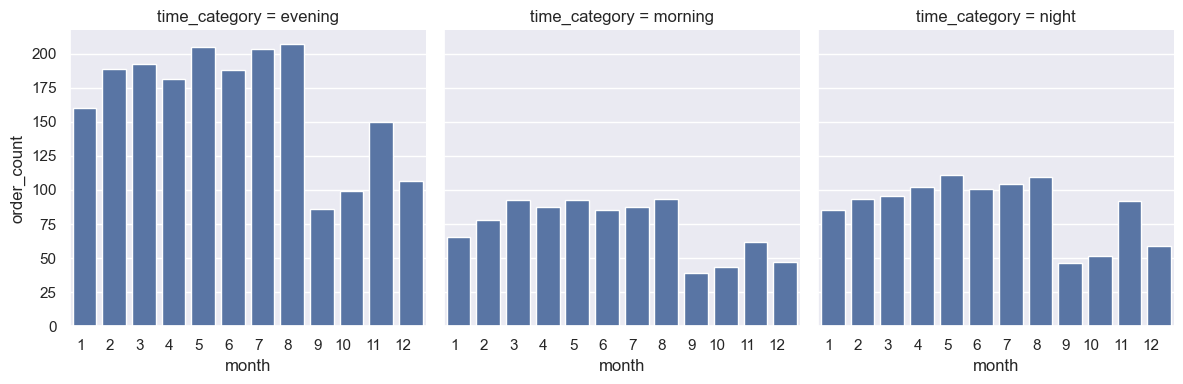

In [61]:
# membuat plot berdasarkan time_group bulan
g = sns.FacetGrid(most_frequent_times, col="time_category", col_wrap=3, height=4)
g.map(sns.barplot, "month", "order_count",errorbar=None)
g.set_xticklabels(rotation=0, ha='right')
plt.tight_layout()
plt.show()

C:\Users\jufor\anaconda3\envs\project2024\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2000x1200 with 0 Axes>

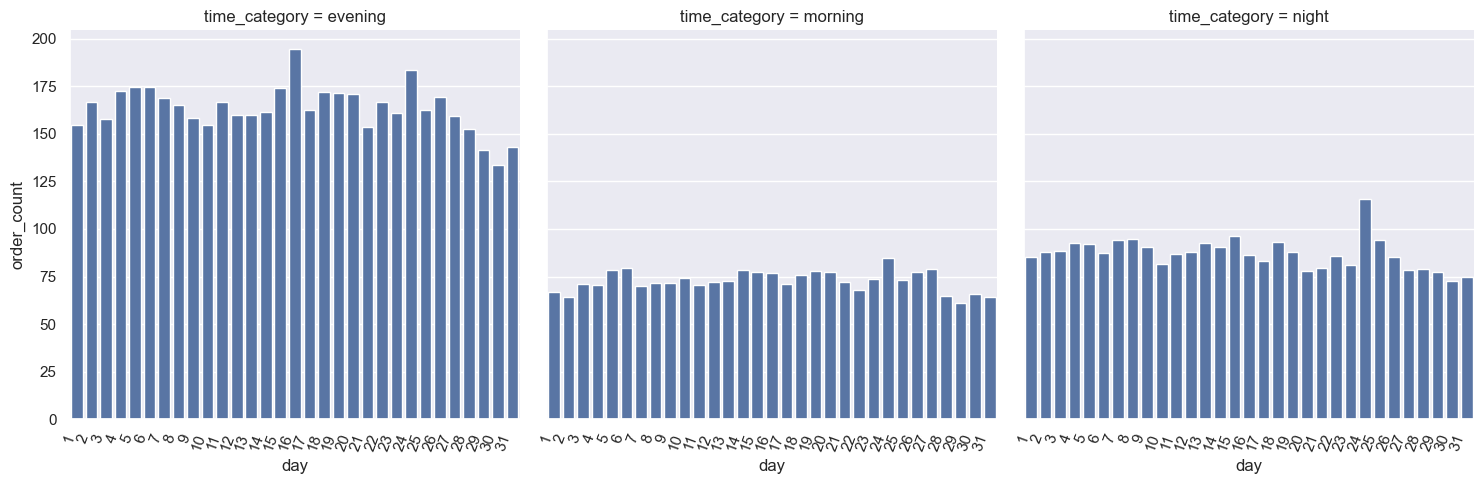

In [62]:
# membuat plot berdasarkan time_group hari
plt.figure(figsize=(20, 12))
g = sns.FacetGrid(most_frequent_times, col="time_category", col_wrap=3, height=5)
g.map(sns.barplot, "day", "order_count",errorbar=None)

# Set x-axis labels rotation and alignment
g.set_xticklabels(rotation=70, ha='right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

4.	Create a grouping table that calculates the average total order value per order and classifies the average order price for each customer with the assumption that prices above 2500 are called expensive, prices between 1000 - 2500 are called normal, prices below 1000 are called cheap

                            customer_id                          order_id  \
0      00012a2ce6f8dcda20d059ce98491703  5f79b5b0931d63f1a42989eb65b9da6e   
1      000161a058600d5901f007fab4c27140  a44895d095d7e0702b6a162fa2dbeced   
2      0001fd6190edaaf884bcaf3d49edf079  316a104623542e4d75189bb372bc5f8d   
3      0002414f95344307404f0ace7a26f1d5  5825ce2e88d5346438686b0bba99e5ee   
4      000379cdec625522490c315e70c7a9fb  0ab7fb08086d4af9141453c91878ed7a   
...                                 ...                               ...   
98661  fffcb937e9dd47a13f05ecb8290f4d3e  620ddc9fbe3e445676a8e71d4a830821   
98662  fffecc9f79fd8c764f843e9951b11341  814d6a3a7c0b32b2ad929ac6328124e9   
98663  fffeda5b6d849fbd39689bb92087f431  8c855550908247a7eff50281b92167a8   
98664  ffff42319e9b2d713724ae527742af25  83b5fc912b2862c5046555ded1483ae9   
98665  ffffa3172527f765de70084a7e53aae8  d0e7be325a1c986babc4e1cdb91edc03   

       avg_order_value  avg_order_price  avg_freight_value  \
0            

C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\2198994213.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='order_price_category', y='avg_order_value', data=avg_order_value, palette='Set1')


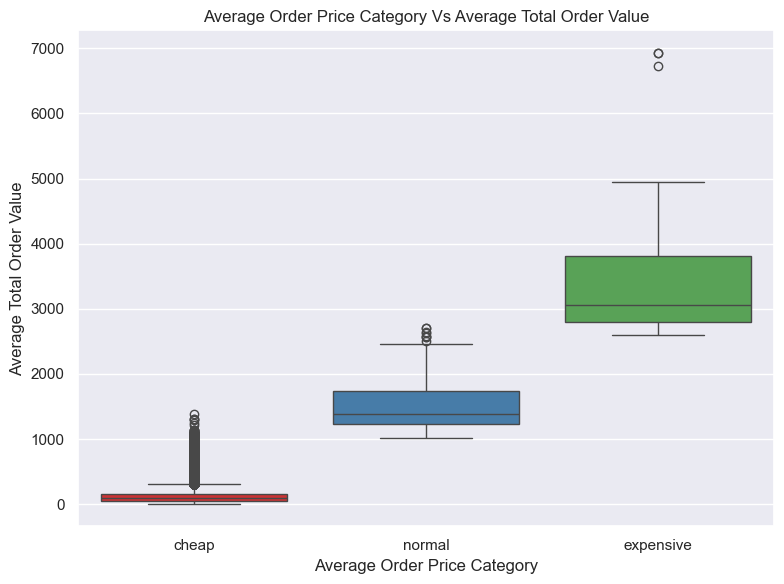

C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\2198994213.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='order_price_category', y='avg_freight_value', data=avg_order_value, palette='Set1')


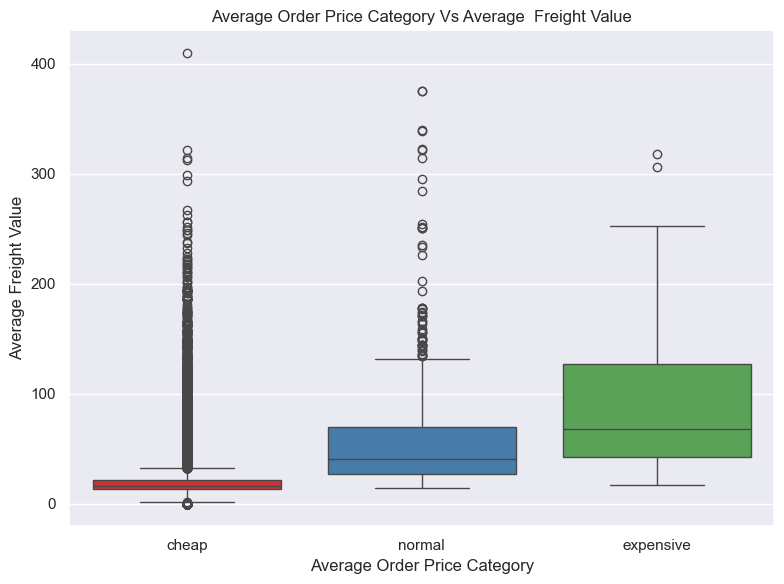

In [63]:
# Menghitung rata rata total nilai order per order untuk setiap customer
avg_order_value = data_olah.groupby(['customer_id', 'order_id'])[['total_order_value', 'price', 'freight_value','product_weight_g']].mean().reset_index()
avg_order_value.rename(columns={'total_order_value': 'avg_order_value', 'price': 'avg_order_price', 'freight_value':'avg_freight_value',
                               'product_weight_g':'avg_product_weight_g'}, inplace=True)

# Melakukan kategori rata rata  order price per customer
def classify_order_price(avg_value):
    if avg_value > 2500:
        return 'expensive'
    elif avg_value >= 1000:
        return 'normal'
    else:
        return 'cheap'

avg_order_value['order_price_category'] = avg_order_value['avg_order_price'].apply(classify_order_price)

# Display the result
print(avg_order_value)

# Visualisasi menggunakan boxplot: Average Order Price Category Vs Average Total Order Value
plt.figure(figsize=(8, 6))
sns.boxplot(x='order_price_category', y='avg_order_value', data=avg_order_value, palette='Set1')
plt.title('Average Order Price Category Vs Average Total Order Value')
plt.xlabel('Average Order Price Category')
plt.ylabel('Average Total Order Value')
plt.tight_layout()
plt.show()

# Visualisasi menggunakan boxplot: Average Order Price Category Vs Average  Freight Value
plt.figure(figsize=(8, 6))
sns.boxplot(x='order_price_category', y='avg_freight_value', data=avg_order_value, palette='Set1')
plt.title('Average Order Price Category Vs Average  Freight Value')
plt.xlabel('Average Order Price Category')
plt.ylabel('Average Freight Value')
plt.tight_layout()
plt.show()



C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\2078510983.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='avg_freight_value', y='avg_product_weight_g', data=avg_order_value, palette='Set1')


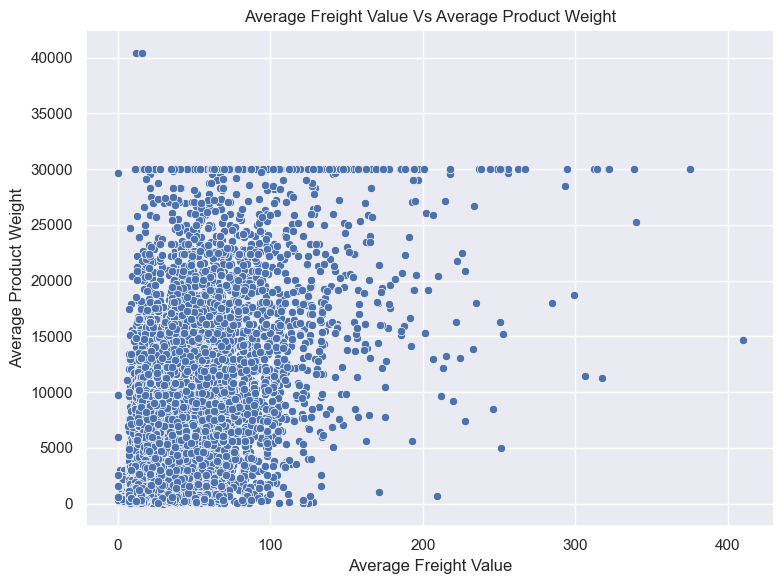

In [64]:
# Visualisasi menggunakan boxplot Average Freight Value Vs Average Product Weigh
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_freight_value', y='avg_product_weight_g', data=avg_order_value, palette='Set1')
plt.title('Average Freight Value Vs Average Product Weight')
plt.xlabel('Average Freight Value')
plt.ylabel('Average Product Weight')
plt.tight_layout()
plt.show()

C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\2414827594.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='avg_freight_value', y='avg_order_price', data=avg_order_value, palette='Set1')


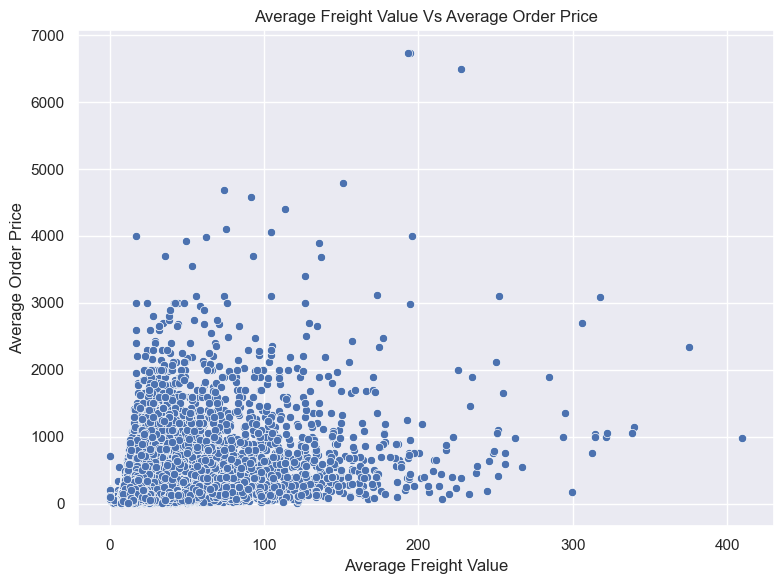

In [30]:
# Visualisasi menggunakan boxplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_freight_value', y='avg_order_price', data=avg_order_value, palette='Set1')
plt.title('Average Freight Value Vs Average Order Price')
plt.xlabel('Average Freight Value')
plt.ylabel('Average Order Price')
plt.tight_layout()
plt.show()

5.	Create a grouping table that calculates the most popular payment methods and the preference of each customer's product category

Most popular payment methods:


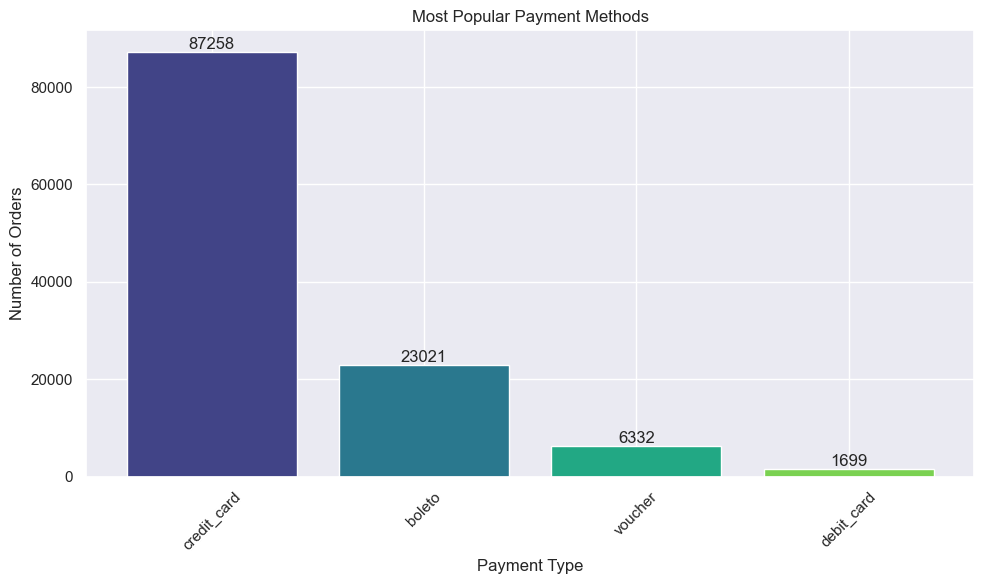

C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\970530336.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_type', y='price', data=data_olah, palette='Set1')


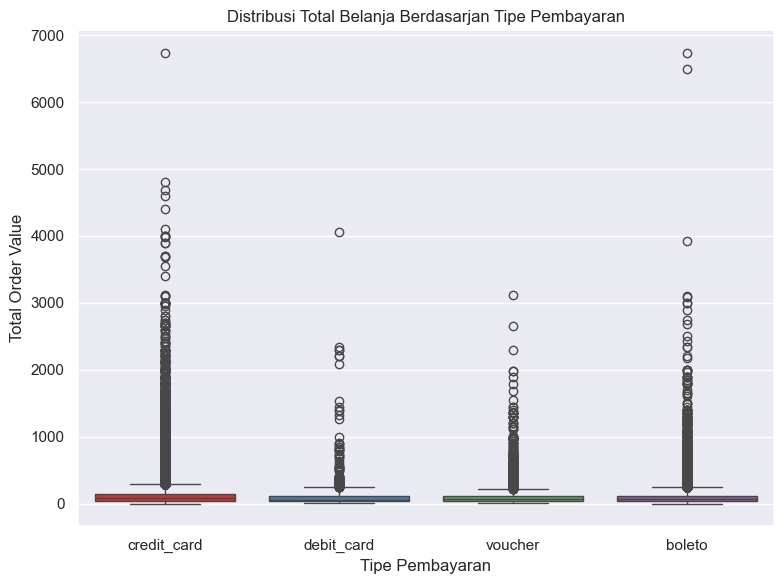

In [65]:
# Menghitung Metode pembayaran yang paling banyak digunakan
popular_payment_methods = data_olah['payment_type'].value_counts().reset_index()
popular_payment_methods.columns = ['payment_type','order_count']

# Display results
print("Most popular payment methods:")
# Menggunakan seaborn untuk palet warna
palette = sns.color_palette("viridis", len(popular_payment_methods))

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(popular_payment_methods['payment_type'], popular_payment_methods['order_count'], color=palette)

# Menampilkan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.title('Most Popular Payment Methods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Payment Type dan Total Order Value
plt.figure(figsize=(8, 6))
sns.boxplot(x='payment_type', y='price', data=data_olah, palette='Set1')
plt.title('Distribusi Total Belanja Berdasarjan Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Total Order Value')
plt.tight_layout()
plt.show()


Preference of each customer's product category:


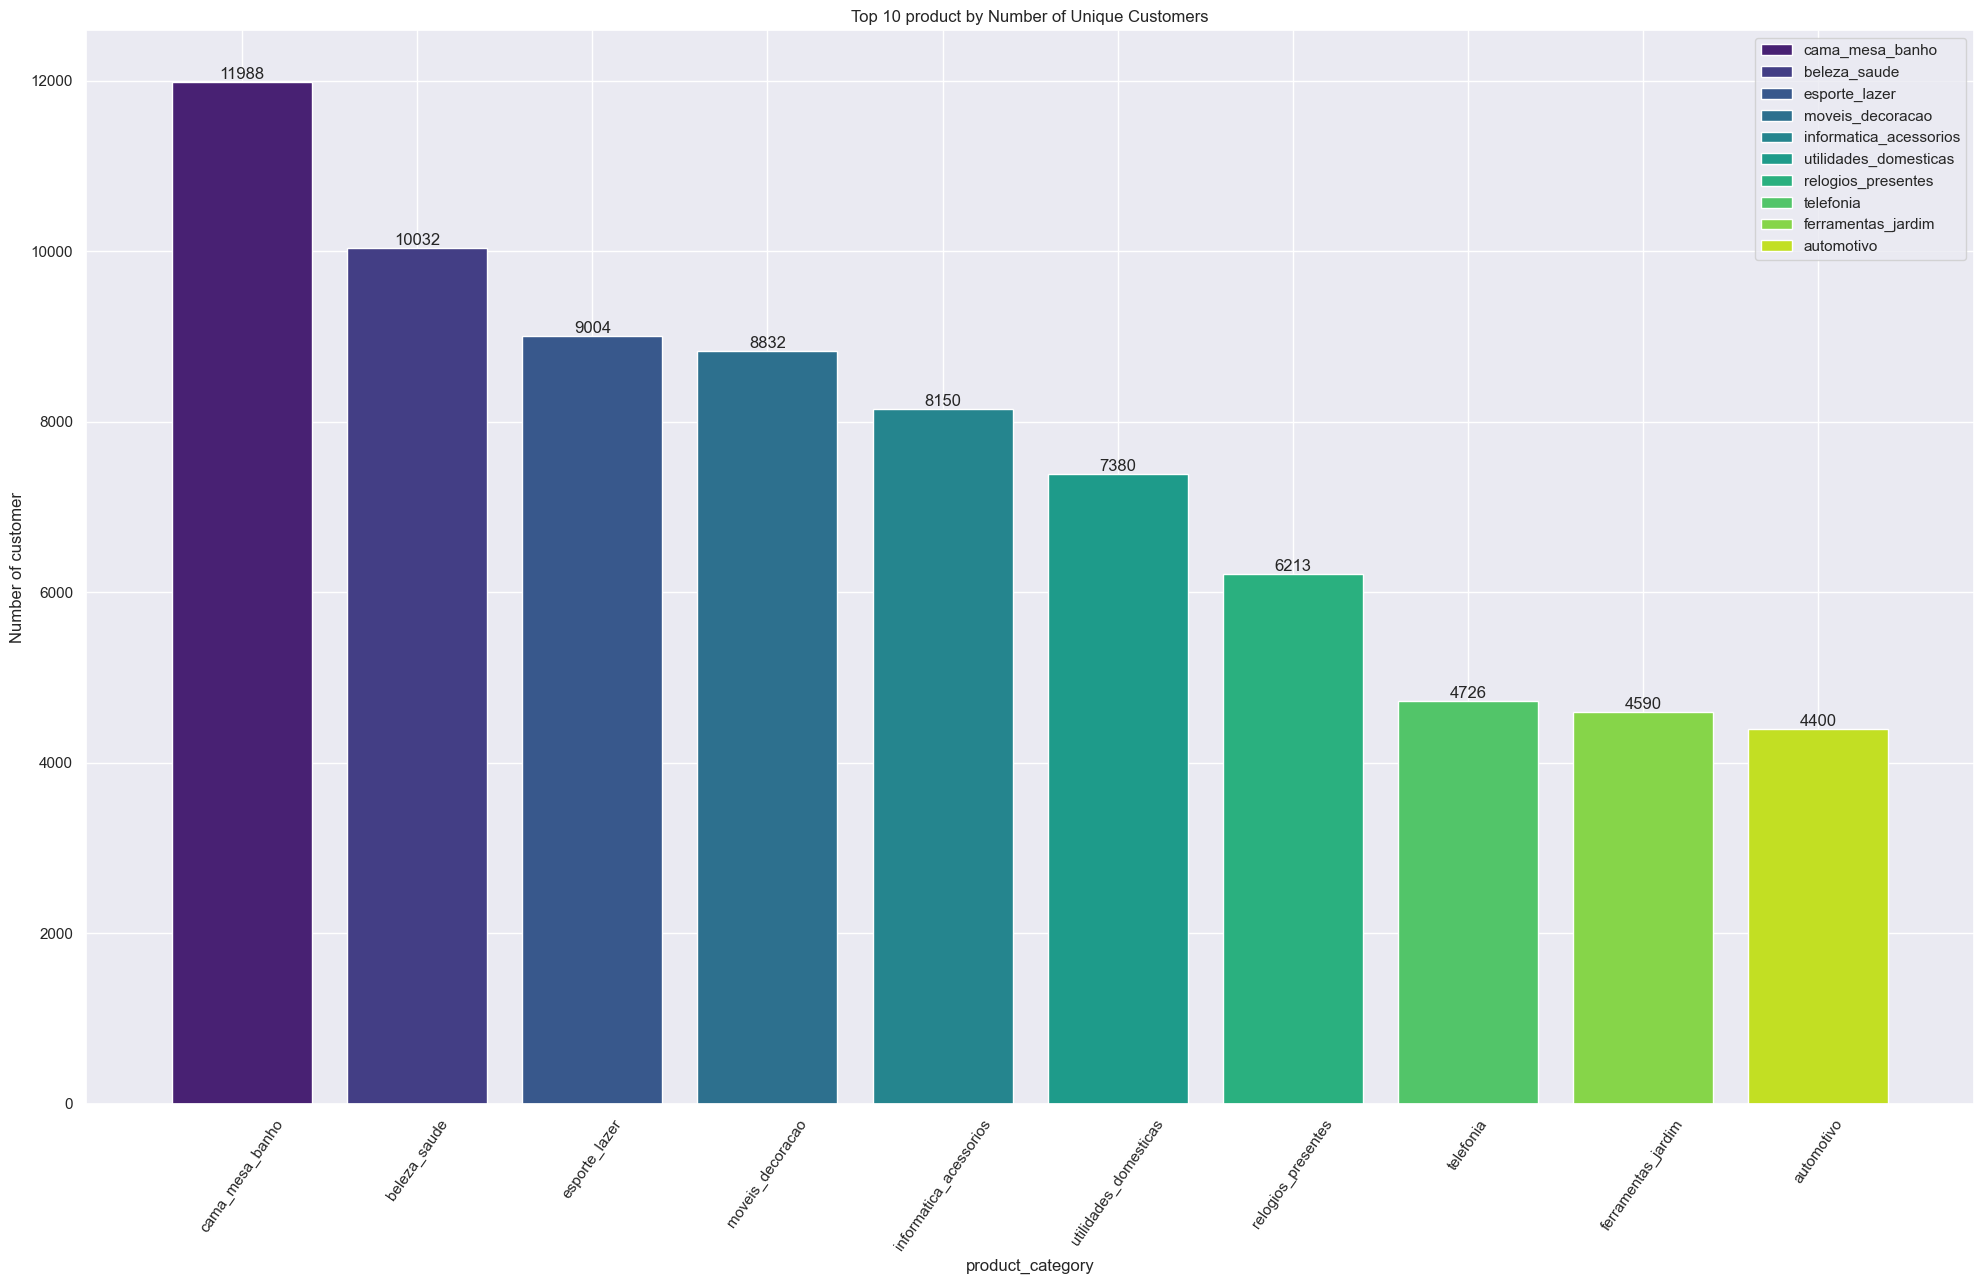

In [66]:
# Menghitung preferensi setiap customer terhadap produk
customer_product_preference = data_olah.groupby('product_category_name').size().reset_index()
customer_product_preference.columns = [ 'product_category_name', 'order_count']

print("\nPreference of each customer's product category:")
# Urutkan berdasarkan 'total_unique_customers' secara descending
top_10_product_preference = customer_product_preference.sort_values(by='order_count', ascending=False).head(10)

# Menggunakan seaborn untuk palet warna
palette = sns.color_palette("viridis", len(top_10_product_preference))

# Visualization
plt.figure(figsize=(20, 13))
bars = plt.bar(top_10_product_preference['product_category_name'], top_10_product_preference['order_count'], color=palette)

# Menampilkan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')
    
plt.xlabel('product_category')
plt.ylabel('Number of customer')
plt.title('Top 10 product by Number of Unique Customers')
plt.xticks(rotation=55)

# Creating custom legend
legend_labels = top_10_product_preference['product_category_name']
plt.legend(bars, legend_labels, loc='upper right')

plt.tight_layout()
plt.show()

C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\4240702633.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_per_paymenttype =  category_orders_per_payment.groupby('payment_type').apply(lambda x: x.nlargest(3, 'order_count')).reset_index(drop=True)


3 Top ordered categories per Payment:
   payment_type   product_category_name  order_count
0        boleto  informatica_acessorios         2177
1        boleto         cama_mesa_banho         1903
2        boleto            beleza_saude         1881
3   credit_card         cama_mesa_banho         9081
4   credit_card            beleza_saude         7605
5   credit_card           esporte_lazer         6671
6    debit_card            beleza_saude          157
7    debit_card  informatica_acessorios          148
8    debit_card         cama_mesa_banho          145
9       voucher         cama_mesa_banho          859
10      voucher        moveis_decoracao          539
11      voucher   utilidades_domesticas          507


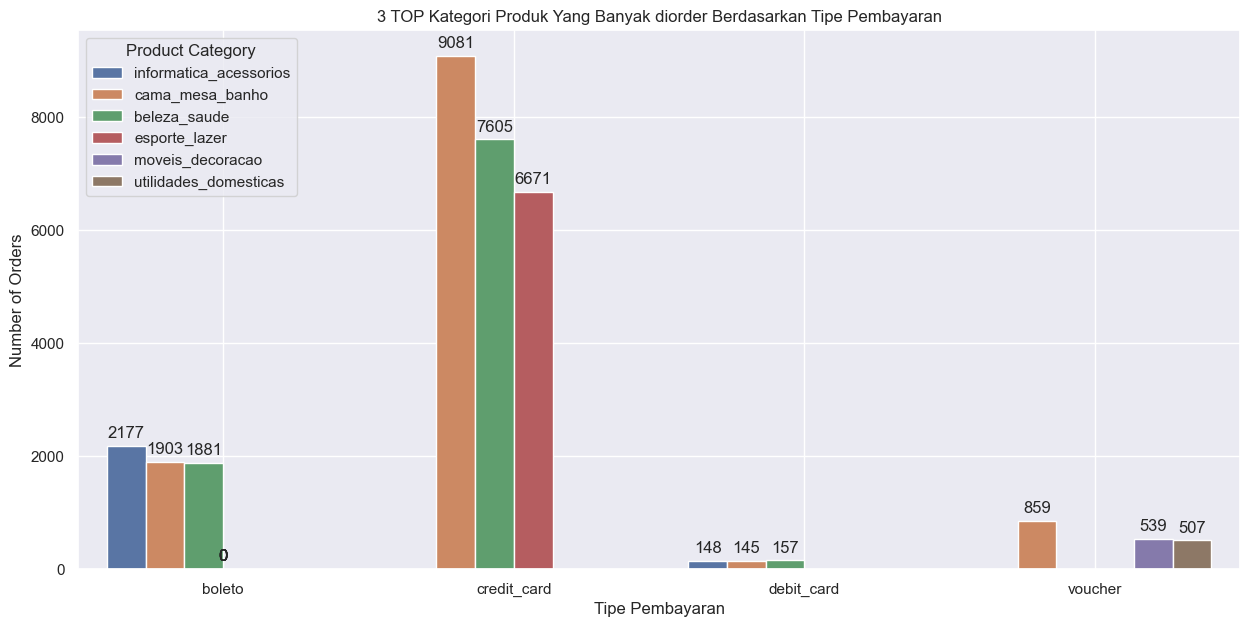

In [71]:
# Mengelompokkan tipe pembayaran dan produk
category_orders_per_payment = data_olah.groupby(['payment_type', 'product_category_name']).size().reset_index(name='order_count')

# Mencari 3 Top kategori berdasarkan tipe pembayaran
top_categories_per_paymenttype =  category_orders_per_payment.groupby('payment_type').apply(lambda x: x.nlargest(3, 'order_count')).reset_index(drop=True)
print("3 Top ordered categories per Payment:")
print(top_categories_per_paymenttype)

# Melihat perkembangan 3 top kategori disetiap tahun
plt.figure(figsize=(15, 7))
bar = sns.barplot(x='payment_type', y='order_count', hue='product_category_name', data=top_categories_per_paymenttype)

# Menampilkan jumlah
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')
    
plt.title('3 TOP Kategori Produk Yang Banyak diorder Berdasarkan Tipe Pembayaran')
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Number of Orders')
plt.legend(title='Product Category', loc='upper left')
plt.grid(True)
plt.show()

6.	What are the most ordered categories each year and how are the categories developing each year?

C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\912167525.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_per_year =  category_orders_per_year.groupby('year').apply(lambda x: x.nlargest(3, 'order_count')).reset_index(drop=True)


Most ordered categories each year:
   year   product_category_name  order_count
0  2016        moveis_decoracao           81
1  2016            beleza_saude           53
2  2016              perfumaria           36
3  2017         cama_mesa_banho         5774
4  2017        moveis_decoracao         4439
5  2017           esporte_lazer         4308
6  2018         cama_mesa_banho         6206
7  2018            beleza_saude         6133
8  2018  informatica_acessorios         4884


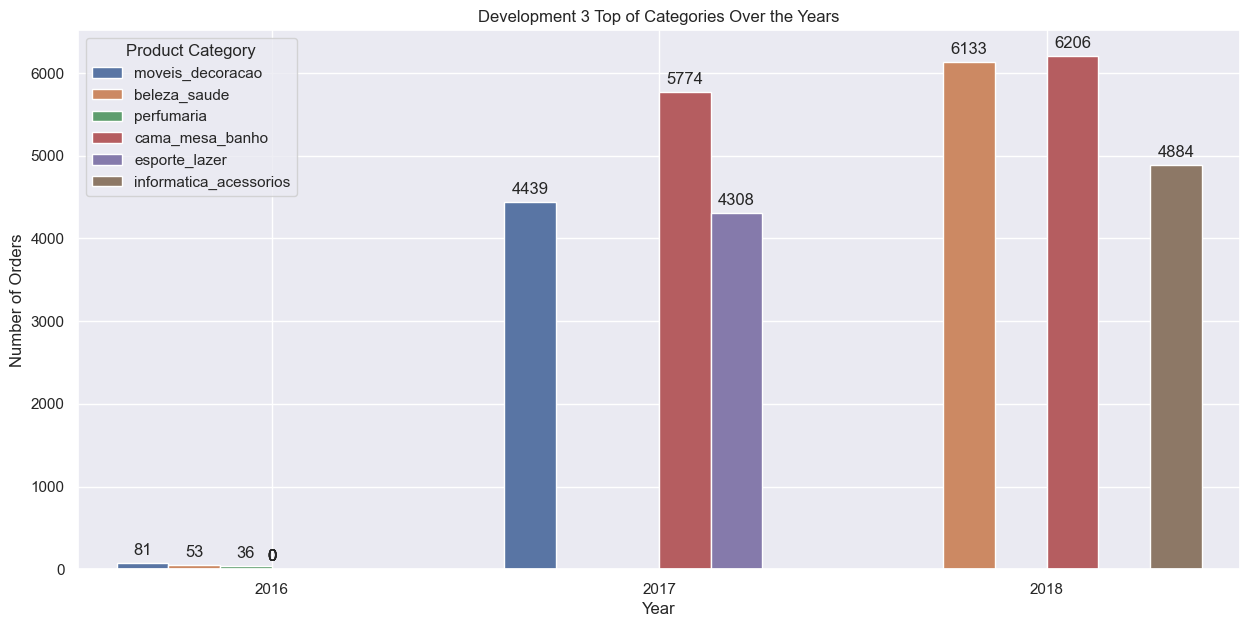

In [72]:
# Mengelompokkan berdasarkan tahun dan produk
category_orders_per_year = data_olah.groupby(['year', 'product_category_name']).size().reset_index(name='order_count')

# Menampilkan 3 Top kategori produk per tahun
top_categories_per_year =  category_orders_per_year.groupby('year').apply(lambda x: x.nlargest(3, 'order_count')).reset_index(drop=True)

# Menampilkan hasil
print("Most ordered categories each year:")
print(top_categories_per_year)

# Visualisasi
plt.figure(figsize=(15, 7))
bar = sns.barplot(x='year', y='order_count', hue='product_category_name', data=top_categories_per_year)

# Menampilkan Jumlah
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 9), 
                 textcoords = 'offset points')
    
plt.title('Development 3 Top of Categories Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.legend(title='Product Category', loc='upper left')
plt.grid(True)
plt.show()

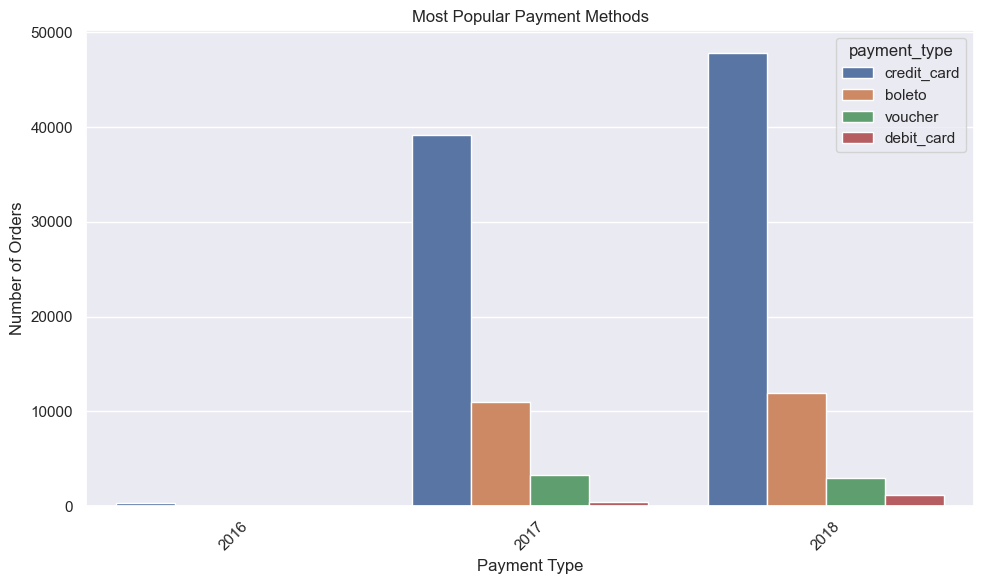

In [70]:
# Mengelompokkan tipe pembayaran per tahun
payment_method_per_year = data_olah.groupby(['year', 'payment_type']).size().reset_index(name='order_count')

# Menampilkan tipe pembayaran per tahun
top_payment_per_year =  payment_method_per_year .sort_values(by='order_count', ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
bar = sns.barplot(x='year', y='order_count', hue='payment_type', data=top_payment_per_year )

plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.title('Most Popular Payment Methods')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Kesimpulan 
---
Berdasarkan eksplorasi step 6 diperoleh insight sebagai berikut:
1. Produk yang paling banyak di pesan adalah cama mesa banho atau dalam bahasa indonesia dikenal dengan perlengkapan meja, kursi, dan kamar mandi. jika di lihat berdasarkan tahunnya produk yang banyak dipesan tahun 2016 berbeda dengan produk yang paling banyak dipesan umumnya yaitu produk moveis decoraco (peralatan dekorasi).
2. Secara keseluruhan perkembangan produk yang paling banyak dipesan (cama mesa banho) meningkat dari 2017 ke 2018. begitu juga dengan produk lainnya sepertisporte lazer, beleza saude,informatica acesories, ultidades domestica (kecuali  movies decoraco). dan yang paling signifikan mengalami kenaikan adalah ultidades domestica, dan beleza saude
3. Jika dilihat dari metode pembayaran yang digunakan, paling banyak menggunakan credit card. sedangkan jika dilihat dari behavior customer, waktu sore dan pada 8 bulan pertama adalah waktu dimana paling banyak customer melakukan pemesanan. ini bisa menjadi signal dalam mengadakan waktu campaign berdasarkan preferensi waktu customer dalam melakukan transaksi dan penggunaan tipe pembayaran
---

### STEP 8: Review Customer
1.	What is the average review score for each customer and create a column for the satisfaction level of each customer assuming a score of 4 & 5 is satisfied, otherwise not satisfied


In [42]:
# karena akan digunakan analisis lebih lanjut, dan kondisi missing yang dimungkinkan  disebabkan karena customer tidak memberikan review maka akan dilakukan Drop Missing value review none
df = df.dropna(subset=['review_score'])

In [43]:
df['review_score']=pd.to_numeric(df['review_score'])

In [48]:
data_olah.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117332 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    117332 non-null  object        
 1   customer_unique_id             117332 non-null  object        
 2   customer_zip_code_prefix       117332 non-null  object        
 3   customer_city                  117332 non-null  object        
 4   customer_state                 117332 non-null  object        
 5   order_id                       117332 non-null  object        
 6   order_status                   117332 non-null  object        
 7   order_purchase_timestamp       117332 non-null  datetime64[ns]
 8   order_approved_at              117332 non-null  object        
 9   order_delivered_carrier_date   117332 non-null  object        
 10  order_delivered_customer_date  117332 non-null  object        
 11  order

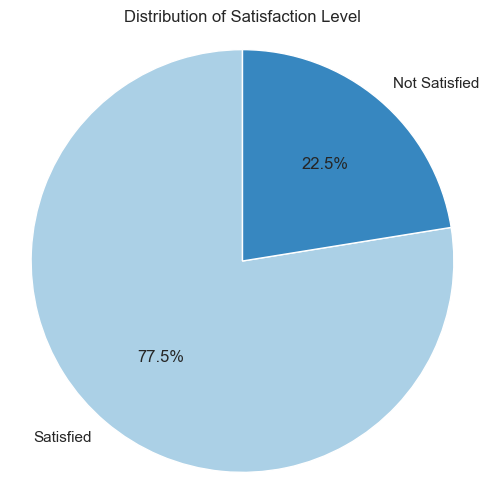

In [73]:
# Menghitung rata rata skor review
average_scores = df.groupby('customer_id')['review_score'].mean().reset_index()

# Mengkategorikan skor review
def satisfaction_level(score):
    if score >= 4:
        return 'Satisfied'
    else:
        return 'Not Satisfied'

# Membuat kolom baru tingkat kepuasan
average_scores['SatisfactionLevel'] = average_scores['review_score'].apply(satisfaction_level)

# Menghitung SatisfactionLevel
average_scores = average_scores['SatisfactionLevel'].value_counts().reset_index()
average_scores.columns = ['SatisfactionLevel', 'order_count']

# Visualisasi dengan pie plot
plt.figure(figsize=(6, 6))
my_palette = sns.color_palette('Blues', 2) 
plt.pie(average_scores['order_count'], labels=average_scores['SatisfactionLevel'], autopct='%1.1f%%', startangle=90, colors=my_palette)
plt.title('Distribution of Satisfaction Level')
plt.axis('equal')  # Memastikan pie chart terlihat seperti lingkaran
plt.show()

2.	Select a customer who fills in the title and message review, then create a table to calculate the total reviews for each customer and combine it with the total order table to find information on the review ratio per transaction for each customer

C:\Users\jufor\AppData\Local\Temp\ipykernel_21424\4185057149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TotalReviews'] = df_filtered.groupby('customer_id').transform('size')


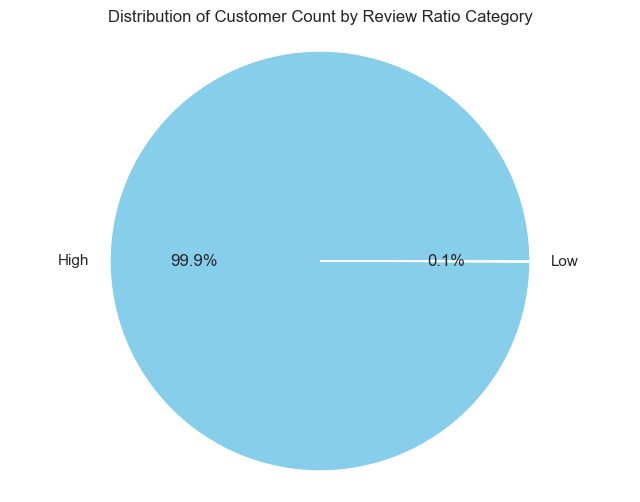

In [74]:
# Melakukan seleksi customer yang mengisi review judul dan review pesan
df_filtered = df[(df['review_comment_title'] != '') & (df['review_comment_message'] != '')]

# Menghitung total review per customer
df_filtered['TotalReviews'] = df_filtered.groupby('customer_id').transform('size')

# Menggabungkan total review dengan total order table
df_order_review = pd.merge(df_filtered[['customer_id', 'TotalReviews']].drop_duplicates(), customer_orders, on='customer_id')
df_order_review

# Menghitung ratio review per transaction untuk setiap customer
df_order_review['ReviewRatioPerTransaction'] = df_order_review['TotalReviews'] / df_order_review['total_orders']
df_order_review.sort_values(by='ReviewRatioPerTransaction')

def categorize_review_ratio(ratio):
    if ratio == 1:
        return 'High'
    elif ratio < 1:
        return 'Low'
    else:
        return 'Undefined'  # Handling unexpected cases

# Mekategorikan review
df_order_review['ReviewRatioCategory'] = df_order_review['ReviewRatioPerTransaction'].apply(categorize_review_ratio)
category_counts = df_order_review['ReviewRatioCategory'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Customer Count by Review Ratio Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

---
Kesimpulan
1. Tingkat kepuasan pelanggan yang puas terhadap layanan olist adalah sebanyak 77.5 persen sedangkan sisanya menyatakan ketidakpuasan. 
2. Jika dilihat berdasarkan Review Ratio per Transaksi ada sebanyak 99.9 persen yang memberikan reviewnya. Jika rasio ini High (Review Ratio mendekati atau sama dengan 1), ini menunjukkan bahwa sebagian besar pelanggan cenderung memberikan umpan balik setelah setiap transaksi. Hal ini dapat diinterpretasikan sebagai kepuasan yang tinggi, karena pelanggan merasa termotivasi atau memiliki kebutuhan untuk menyampaikan pengalaman mereka kepada bisnis baik pengalaman yang baik ataupun yang tidak. sebaliknya Jika rasio ini rendah (kurang dari 1), hal ini mungkin menunjukkan bahwa sebagian pelanggan tidak merasa perlu memberikan ulasan setelah setiap transaksi. Ini dapat mengindikasikan adanya ketidakpuasan, kebutuhan akan perbaikan atau perubahan, atau kurangnya insentif untuk berbagi pengalaman positif.

3. Namun yang menjadi catatan yang perlu dilakukan eksplorasi lanjut adalah adanya data review yang missing yang dihilangkan dalam analisis. sehingga perlu ditelusuri lebih lanjut. namun hal ini belum dilakukan.

#### STEP 9: Time Series Analysis
1.	Time series analysis is an analysis to see the trend of a phenomenon based on time. Try totaling the sales of each item per day. What are the sales trends? Is there an increase, decrease, or stagnant. What should business do?


In [75]:
# Aggregate sales data to total sales per day across all products
daily_sales = data_olah.groupby([data_olah['order_purchase_timestamp'].dt.date, 'product_id'])['total_order_value'].sum().reset_index()
daily_sales

,order_purchase_timestamp,product_id,total_order_value
0,2016-09-04,c1488892604e4ba5cff5b4eb4d595400,71.66
1,2016-09-04,f293394c72c9b5fafd7023301fc21fc2,64.57
2,2016-09-05,f3c2d01a84c947b078e32bbef0718962,75.06
3,2016-09-15,5a6b04657a4c5ee34285d1e4619a96b4,143.46
4,2016-10-02,d2998d7ced12f83f9b832f33cf6507b6,109.34
...,...,...,...
94586,2018-08-29,b6b76b074ed0d77d0f3443b12d8adb5e,106.95
94587,2018-08-29,bdcf6a834e8faa30dac3886c7a58e92e,61.29
94588,2018-08-29,c7f27c5bef2338541c772b5776403e6a,33.23
94589,2018-08-29,d04857e7b4b708ee8b8b9921163edba3,93.75


In [76]:
# Melakukan rekap harian per produk
# Group by date dan itemid, lalu jumlahkan nilai biner
daily_summary= daily_sales.groupby(['order_purchase_timestamp', 'product_id']).sum().reset_index()

# Tampilkan rekap harian per produk
print("\nRekap Harian per Produk:")
daily_summary


Rekap Harian per Produk:


,order_purchase_timestamp,product_id,total_order_value
0,2016-09-04,c1488892604e4ba5cff5b4eb4d595400,71.66
1,2016-09-04,f293394c72c9b5fafd7023301fc21fc2,64.57
2,2016-09-05,f3c2d01a84c947b078e32bbef0718962,75.06
3,2016-09-15,5a6b04657a4c5ee34285d1e4619a96b4,143.46
4,2016-10-02,d2998d7ced12f83f9b832f33cf6507b6,109.34
...,...,...,...
94586,2018-08-29,b6b76b074ed0d77d0f3443b12d8adb5e,106.95
94587,2018-08-29,bdcf6a834e8faa30dac3886c7a58e92e,61.29
94588,2018-08-29,c7f27c5bef2338541c772b5776403e6a,33.23
94589,2018-08-29,d04857e7b4b708ee8b8b9921163edba3,93.75


In [77]:
# Melakukan rekap harian total

# Group by date, lalu jumlahkan nilai biner
daily_summary_total = daily_sales.groupby('order_purchase_timestamp').sum().reset_index()

# Tampilkan rekap harian total
print("\nRekap Harian Total:")
daily_summary_total.sort_values(by='total_order_value')


Rekap Harian Total:


,order_purchase_timestamp,product_id,total_order_value
12,2016-12-23,f5d8f4fbc70ca2a0038b9a0010ed5cb0,19.62
1,2016-09-05,f3c2d01a84c947b078e32bbef0718962,75.06
3,2016-10-02,d2998d7ced12f83f9b832f33cf6507b6,109.34
0,2016-09-04,c1488892604e4ba5cff5b4eb4d595400f293394c72c9b5...,136.23
2,2016-09-15,5a6b04657a4c5ee34285d1e4619a96b4,143.46
...,...,...,...
509,2018-05-16,005030ef108f58b46b78116f754d8d380296dd002a346e...,66424.03
503,2018-05-10,02b824e9f1158bc1005e058c4ea78e8d03e9fcb7adffd8...,67957.60
591,2018-08-06,0127db1f4effcf8f5b88d80588bc5624015527ec9502da...,68080.89
337,2017-11-25,001795ec6f1b187d37335e1c4704762e0043d1a25ef08f...,78735.13


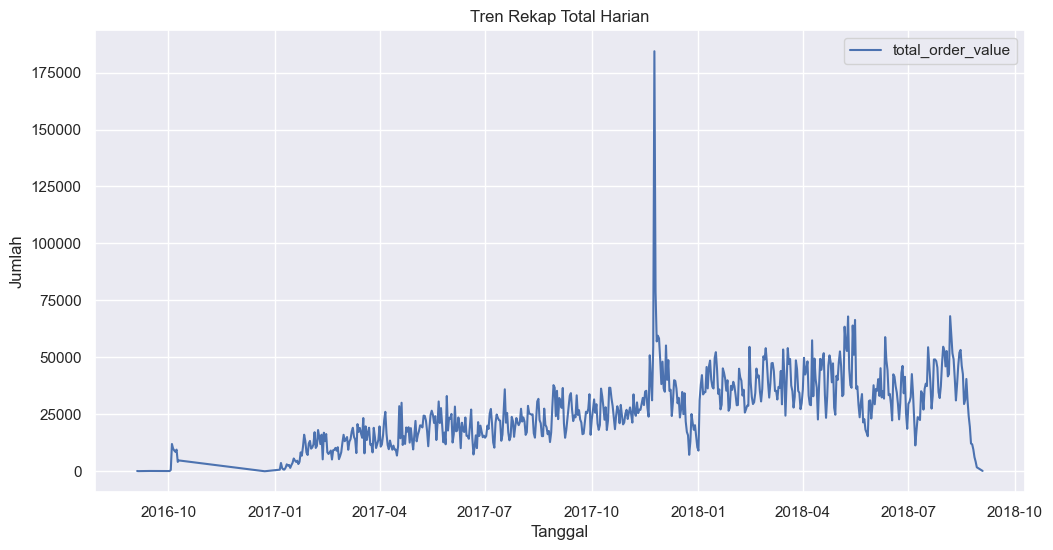

In [78]:
# Kelompokkan data berdasarkan tanggal dan hitung jumlah tindakan per hari
daily_plot = daily_summary_total.groupby('order_purchase_timestamp')['total_order_value'].sum()

# Visualisasi dengan line chart
sns.set(style="darkgrid")
daily_plot.plot(kind='line', figsize=(12, 6) )
plt.title('Tren Rekap Total Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.grid(True)
plt.legend()
plt.show()


2.	Perform a seasonality analysis by looking at the total orders per day from Monday to Sunday.

In [45]:
data_olah

,customer_id,customer_unique_id,address_city,address_static,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,...,review_comment_message,review_creation_date,review_answer_timestamp,year,month,name_day,hour,total_order_value,time_category,day
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,...,,2017-05-26 00:00:00,2017-05-30 22:34:40,2017,5,Tuesday,15,146.87,evening,16
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,...,,2018-01-30 00:00:00,2018-02-10 22:43:29,2018,1,Friday,20,335.48,night,12
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,...,,2018-06-15 00:00:00,2018-06-15 12:10:59,2018,5,Saturday,16,157.73,evening,19
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,...,,2018-03-29 00:00:00,2018-04-02 18:36:47,2018,3,Tuesday,16,173.30,evening,13
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,...,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,2018,7,Sunday,9,252.25,morning,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,1,ccb4503d9d43d245d3b295d0544f988b,527801b552d0077ffd170872eb49683b,...,,2018-04-14 00:00:00,2018-04-28 11:15:04,2018,4,Saturday,15,88.78,evening,7
119139,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,1,9ede6b0570a75a4b9de4f383329f99ee,3fd1e727ba94cfe122d165e176ce7967,...,,2018-04-12 00:00:00,2018-04-16 10:36:05,2018,4,Wednesday,8,129.06,morning,4
119140,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,1,7a5d2e1e131a860ae7d18f6fffa9d689,d9e7e7778b32987280a6f2cb9a39c57d,...,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07,2018,4,Sunday,20,56.04,night,8
119141,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,1,f819f0c84a64f02d3a5606ca95edd272,4869f7a5dfa277a7dca6462dcf3b52b2,...,,2017-11-17 00:00:00,2017-11-19 23:34:18,2017,11,Friday,21,711.07,night,3


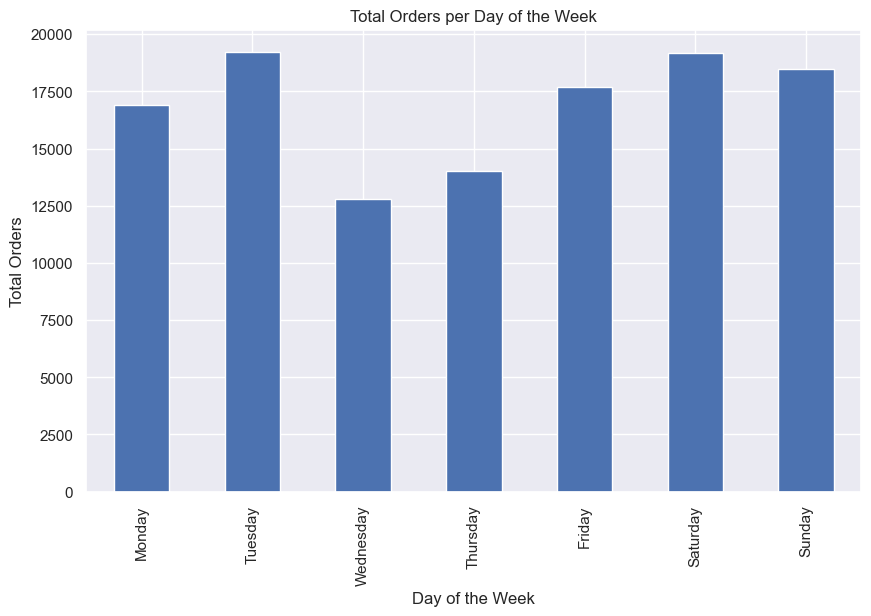

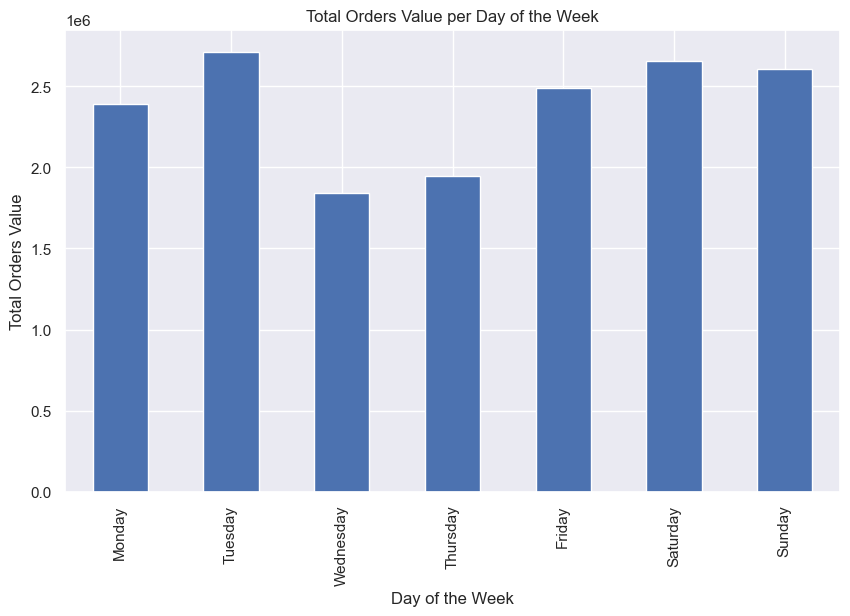

In [82]:
# Visualisasi total order berdasarkan hari
weekly_orders = data_olah.groupby('name_day')['order_id'].count()

# Plotting
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_orders.plot(kind='bar', figsize=(10, 6))
plt.title('Total Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.xticks(range(7), weekdays)
plt.grid(True)
plt.show()

# Visualisasi total order value berdasarkan hari
weekly_orders_value = data_olah.groupby('name_day')['total_order_value'].sum()

# Plotting
weekly_orders_value.plot(kind='bar', figsize=(10, 6))
plt.title('Total Orders Value per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders Value')
plt.xticks(range(7), weekdays)
plt.grid(True)
plt.show()


---
#### Kesimpulan Poin 9

Berdasarkan tren jumalh nilaiorder penjualan per hari, secara umum mengalami kenaikan pada tanggal 2017-11-24. Namun meskipun menunjukkan tren yang naik ada potensi penurunan nilai pembelanjaan pada awal tahun 2018 dan pada pertengahan tahun 2018. sedangkan jika dilihat berdasarkan Day of Week, penjualan terbanyak ada di hari Selasa dan diikuti dengan hari weekend.  Namun pada hari rabu, baik order maupun nilainya lebih kecil dibandingkan hari lainnya. hal ini dapat memberikan signal pertimbangan dalam memberikan campign dihari-hari tersebut khususnya dihari yang sepi penjualan (rabu dan kamis)

----

--- 
## CONCLUSION

---
Trend Penjualan secara umum penjualan dari 2016-2018 mengalami peningkatan dan ada peningkatan belanja yang signifikan pada  tanggal 24 November 2017 (Festival Black Friday) ditandai dengan diskon dan promosi besar besaran. Namun pada pertengahan 2018, ada potensi pola  penurunan penjualan yang menurun sehingga perlu dilakukan strategi strategi khusus untuk menarik minat customer melakukan transaksi kembali. 

---
Customer Demographic & Behaviour
Customer top OLIST yang menjadi sumber pendapatan terbanyak (2016-2018) berasal dari negara bagian brazil yaitu negara bagian Sao paulo(SP) dikota sao paulo dan disusul 2 besar lainnya negara bagian Rio de Janeiro (RJ) kota rio de Janeiro dan negara bagian Minas Gerais (MG) di kota belo horizante. Dimana ketiga kota tersebut merupakan salah satu kota dengan pusat pasar ekonomi terbesar.

---
Top Produk yang paling banyak di pesan adalah cama mesa banho (perlengkapan meja, tempat tidur, dan kamar mandi). Produk tersebut meningkat setiap tahunnya begitu juga dengan produk lainnya seperti sporte lazer, beleza saude,informatica acesories, ultidades domestica (Jika dilihat dari metode pembayaran yang digunakan, paling banyak menggunakan credit card. sedangkan jika dilihat dari behavior customer, waktu sore dan pada 8 bulan pertama adalah waktu dimana paling banyak customer melakukan pemesanan. ini bisa menjadi signal pertimbangan dalam mengadakan waktu campaign berdasarkan preferensi waktu customer dalam melakukan transaksi dan penggunaan tipe pembayaran serta asal customer.

---
Tingkat kepuasan pelanggan yang puas terhadap layanan olist adalah sebanyak 77.5 persen sedangkan sisanya menyatakan ketidakpuasan. Jika dilihat berdasarkan Review Ratio per Transaksi ada sebanyak 99.9 persen yang memberikan reviewnya. Jika rasio ini High (Review Ratio mendekati atau sama dengan 1), ini menunjukkan bahwa sebagian besar pelanggan cenderung memberikan umpan balik setelah setiap transaksi. Namun yang menjadi catatan dari total transaksi, sebanyak 17% tidak memberikan ulasan, dan 1 persen, datanya kosong atau missing. Perlu dilakukan analisis lebih lanjut mengapa customer tidak memberikan ulasan sehingga dapat diketahui apakah customer puas atau tidak.

---